# Personal Transactions Clustering Analysis
This notebook performs K-Means clustering on personal financial transactions to group users into **high**, **medium**, and **low spenders**, followed by visualizations.

In [1]:
# Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.ticker as mtick


In [2]:
# Load the dataset
df = pd.read_csv('personal_transactions.csv')
df.head()

,User_ID,Date,Description,Amount_INR,Transaction Type,Category,Account Name
0,Aaditya Patil,01-01-2023,Home Improvement - Transaction,36729.99,credit,Home Improvement,Checking
1,Aaditya Patil,02-01-2023,Groceries - Transaction,32311.07,debit,Groceries,Checking
2,Aaditya Patil,03-01-2023,Mobile Phone - Transaction,7748.05,debit,Mobile Phone,Checking
3,Aaditya Patil,04-01-2023,Paycheck - Transaction,289727.27,credit,Paycheck,Savings
4,Aaditya Patil,05-01-2023,Groceries - Transaction,2628.61,debit,Groceries,Credit Card


## Data Preprocessing
We'll aggregate spending per user to understand overall expenditure behavior.

In [3]:
df.columns = df.columns.str.strip()  # clean column names

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])  # drop rows with invalid dates

In [5]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)

In [6]:
df['Amount_INR'] = df['Amount_INR'].abs()  # take absolute values of amounts

In [7]:
# Aggregate spending per user
user_spending = df[df['Transaction Type'] == 'debit'].groupby('User_ID')['Amount_INR'].sum().reset_index()
user_spending.columns = ['User_ID', 'Total_Spending']
user_spending

,User_ID,Total_Spending
0,Aaditya Patil,1.269353e+07
1,Kavi Shah,1.241895e+07
2,Padam Khandelwal,1.293840e+07
3,Tapoprasad Tripathy,1.383721e+07
4,Virnit Gavali,1.174921e+07


In [8]:
# Scale the data for clustering
scaler = StandardScaler()
user_spending['Spending_Scaled'] = scaler.fit_transform(user_spending[['Total_Spending']])
user_spending

,User_ID,Total_Spending,Spending_Scaled
0,Aaditya Patil,1.269353e+07,-0.049709
1,Kavi Shah,1.241895e+07,-0.451996
2,Padam Khandelwal,1.293840e+07,0.309047
3,Tapoprasad Tripathy,1.383721e+07,1.625898
4,Virnit Gavali,1.174921e+07,-1.433239


## K-Means Clustering

In [9]:
# Assume df contains at least: 'User_ID' and 'Transaction_Amount'
users = df['User_ID'].unique()

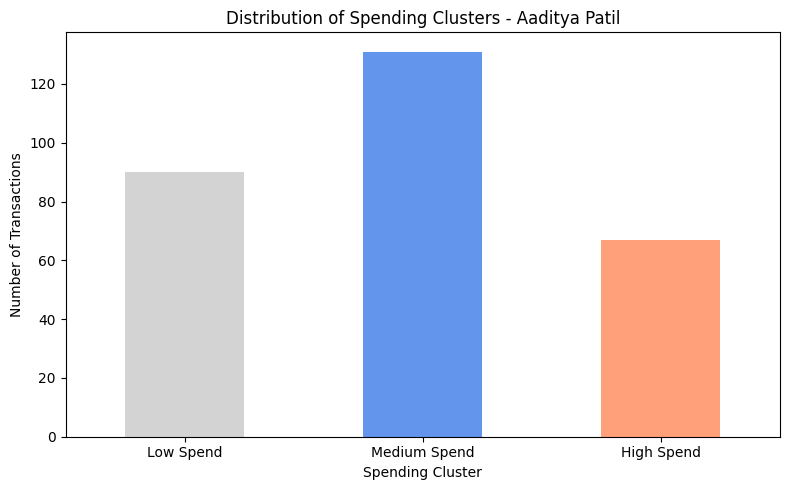

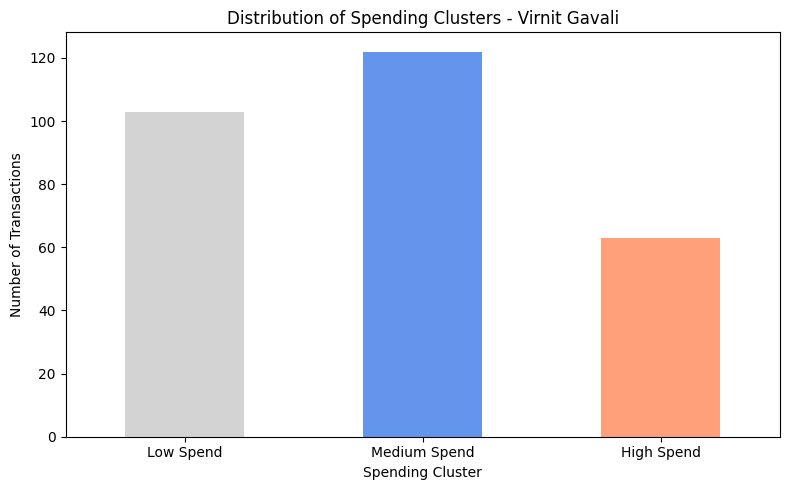

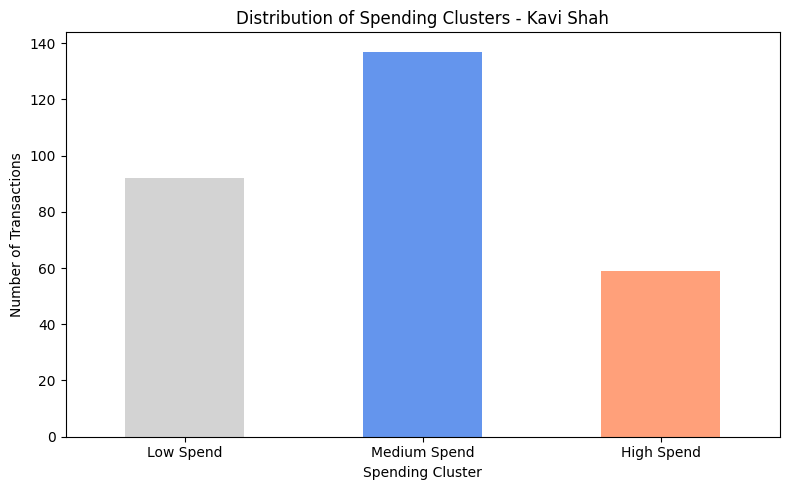

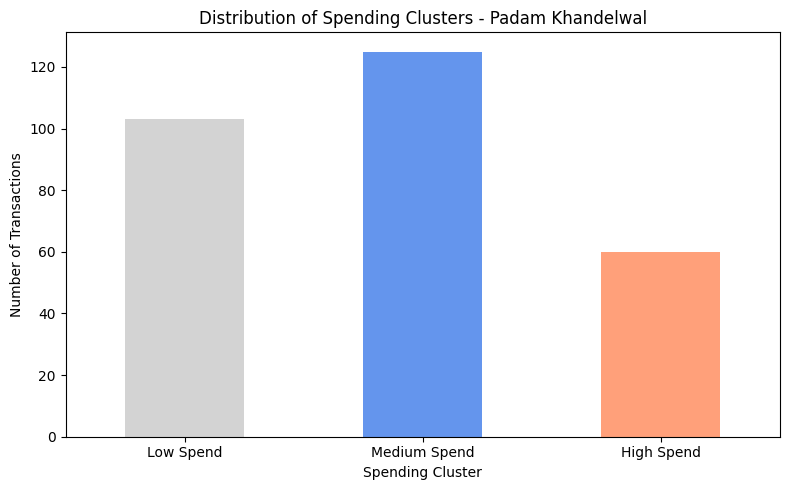

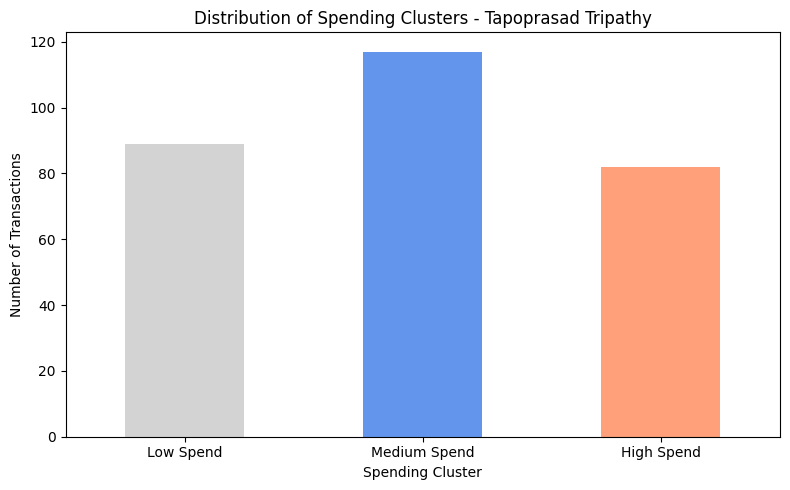

In [10]:
# Define custom threshold-based categorization
def label_spending(amount):
    if amount < 20000:
        return 'Low Spend'
    elif amount <= 100000:
        return 'Medium Spend'
    else:
        return 'High Spend'

# Apply labeling
df['Spending Cluster'] = df['Amount_INR'].apply(label_spending)

# Plot per user
for user in df['User_ID'].unique()[:5]:
    user_data = df[df['User_ID'] == user]
    
    if not user_data.empty:
        plt.figure(figsize=(8, 5))
        user_data['Spending Cluster'].value_counts().reindex(['Low Spend', 'Medium Spend', 'High Spend']).plot(
            kind='bar', 
            color=['lightgray', 'cornflowerblue', 'lightsalmon']
        )
        plt.title(f'Distribution of Spending Clusters - {user}')
        plt.xlabel('Spending Cluster')
        plt.ylabel('Number of Transactions')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

## Visualizations

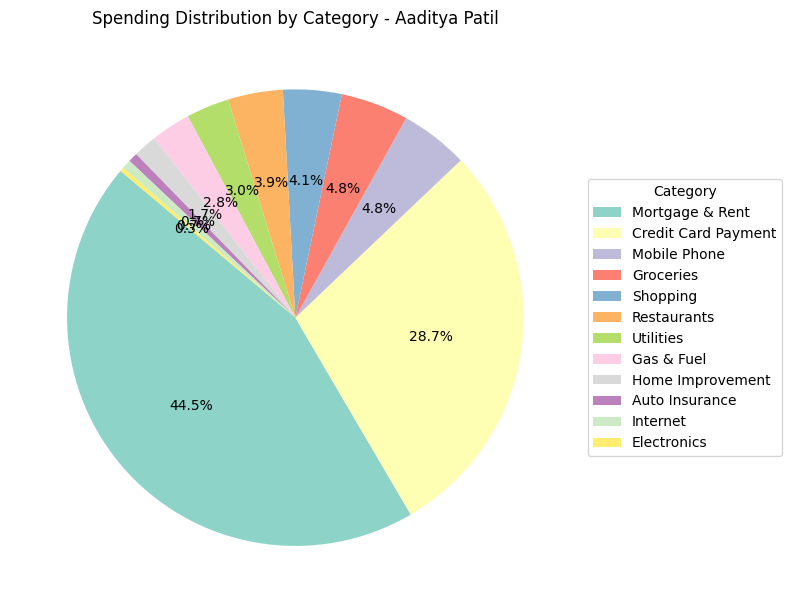

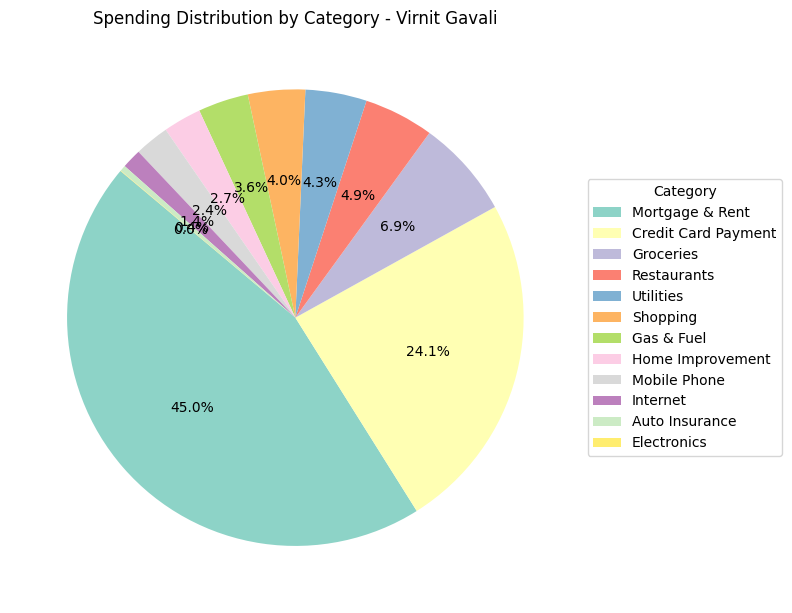

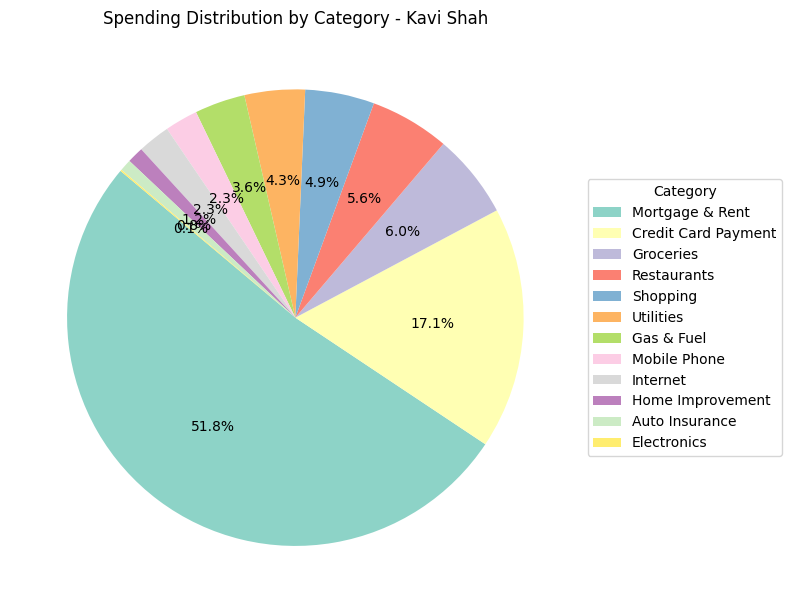

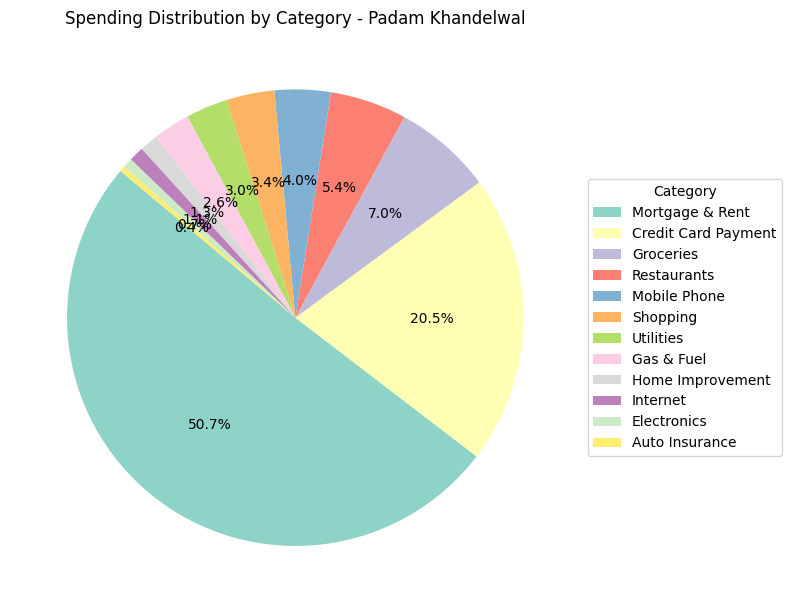

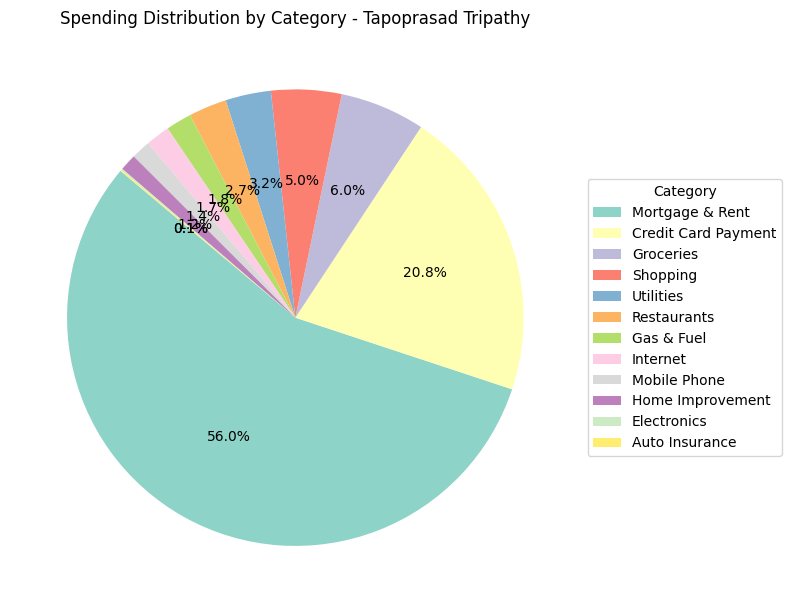

In [20]:
debit_df = df[df['Transaction Type'].str.lower() == 'debit']
users = debit_df['User_ID'].unique()

colors = sns.color_palette('Set3', n_colors=12)
for user in users:
    user_data = debit_df[debit_df['User_ID'] == user]
    category_spending = user_data.groupby('Category')['Amount_INR'].sum().sort_values(ascending=False)

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        category_spending,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(category_spending)]
    )

    # Add a legend showing category-color mapping
    plt.legend(wedges, category_spending.index, title='Category', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Spending Distribution by Category - {user}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

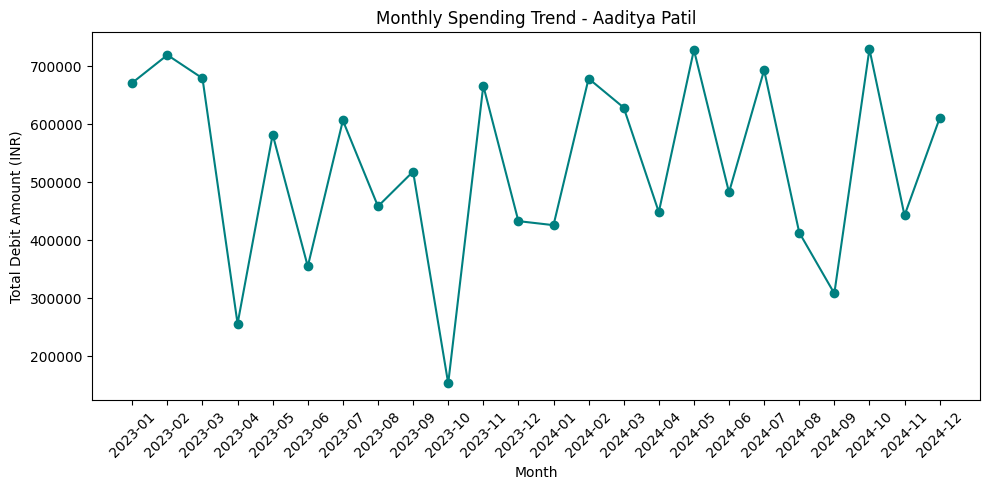

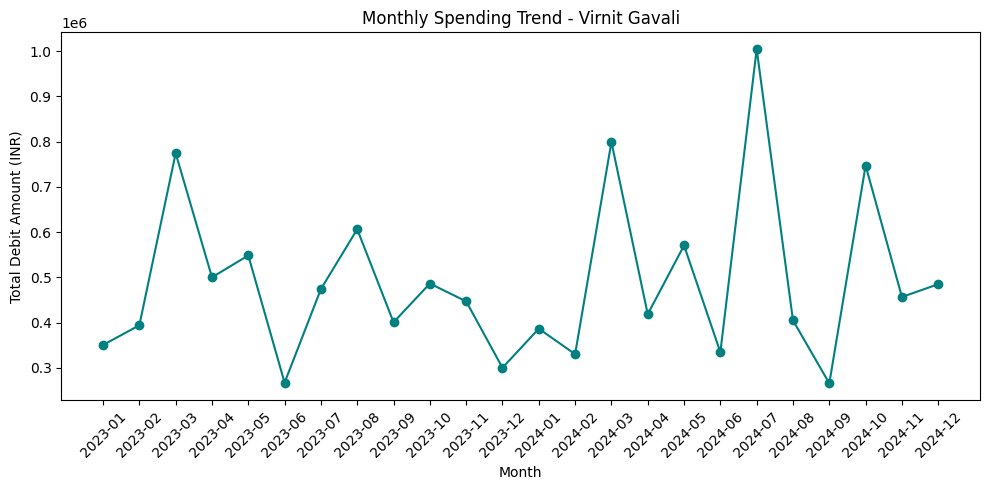

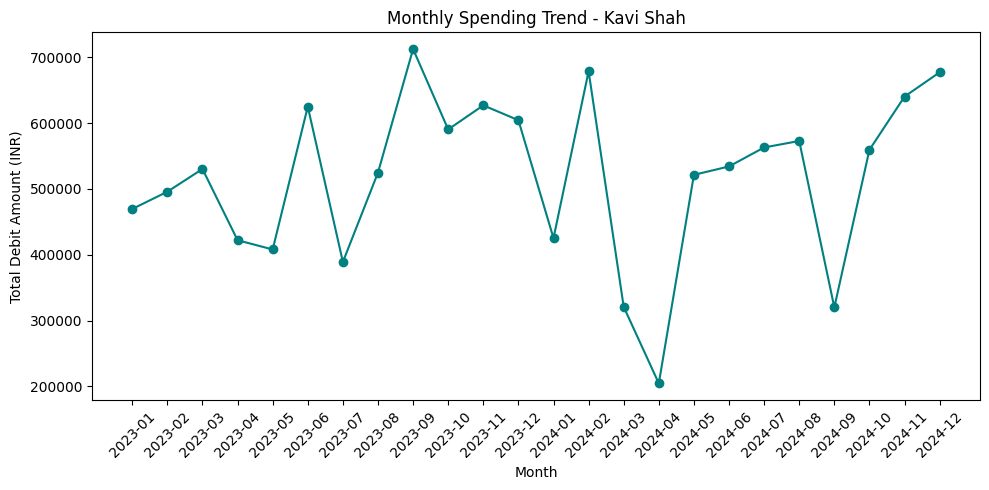

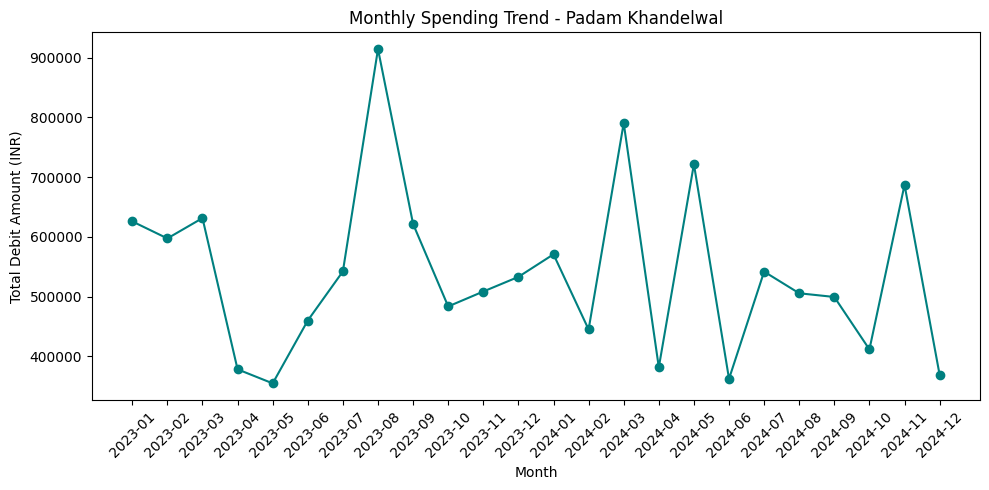

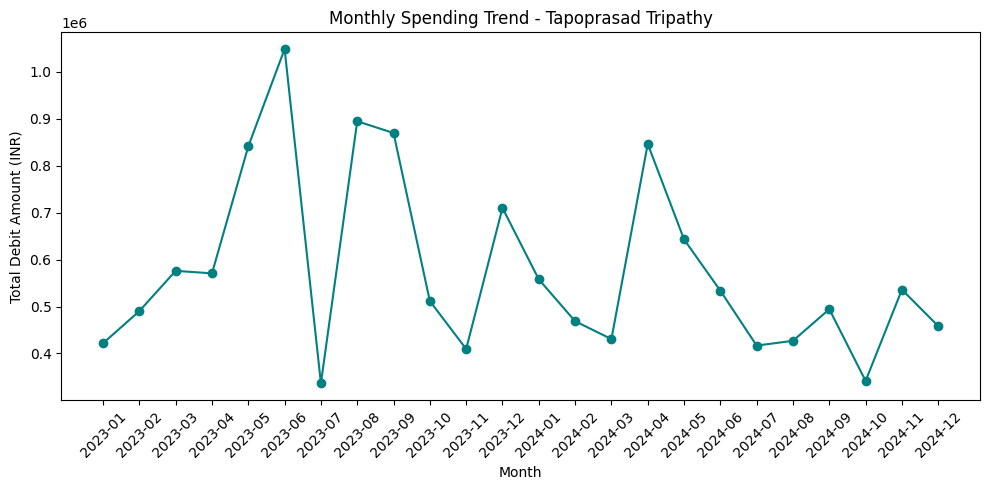

In [22]:
for user in users:
    user_data = debit_df[debit_df['User_ID'] == user]
    monthly_trend = user_data.groupby('Month')['Amount_INR'].sum().sort_index()

    plt.figure(figsize=(10, 5))
    plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='teal')
    plt.title(f'Monthly Spending Trend - {user}')
    plt.xlabel('Month')
    plt.ylabel('Total Debit Amount (INR)')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

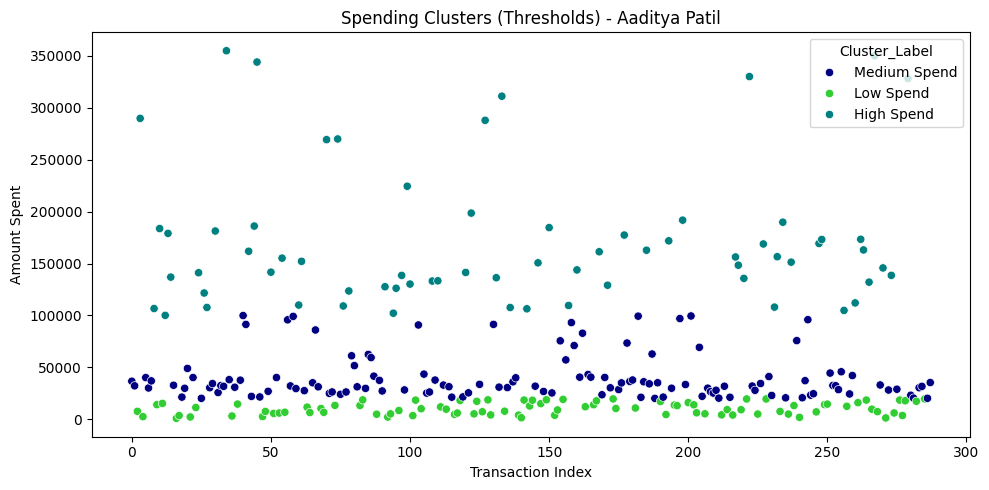

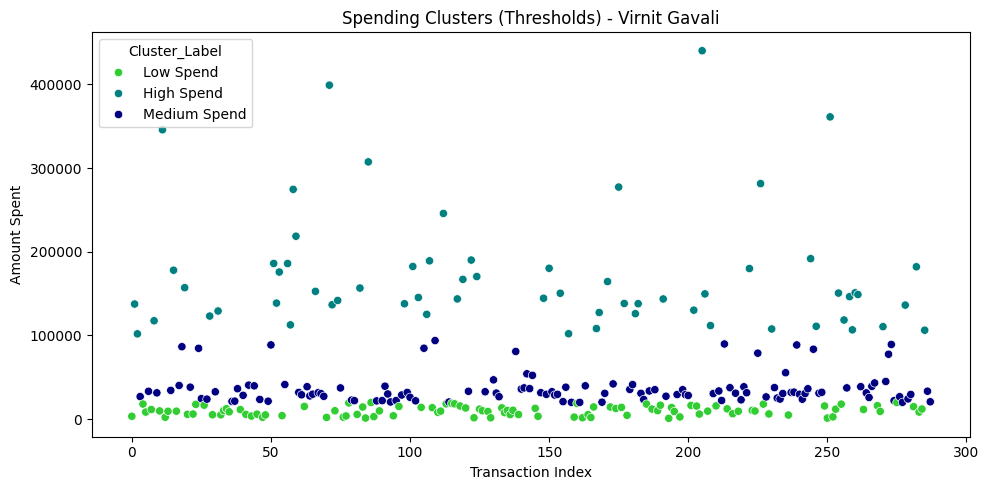

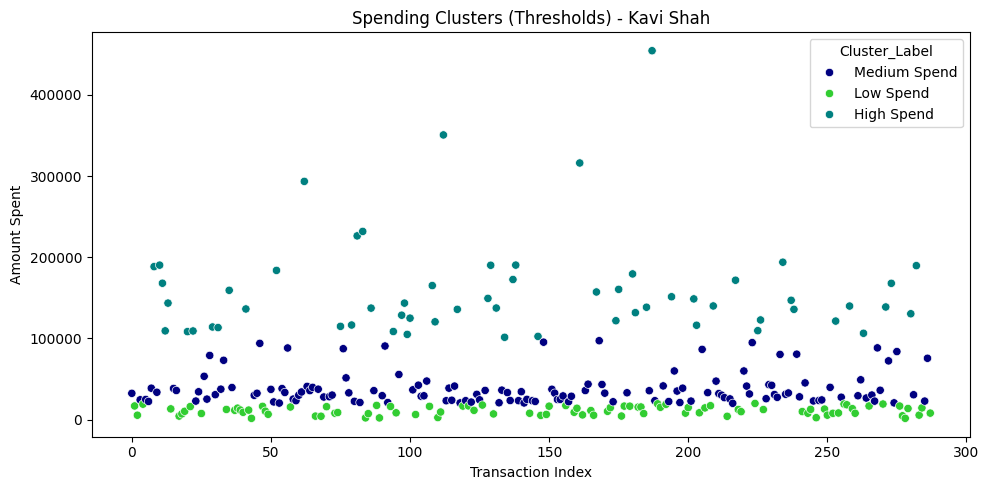

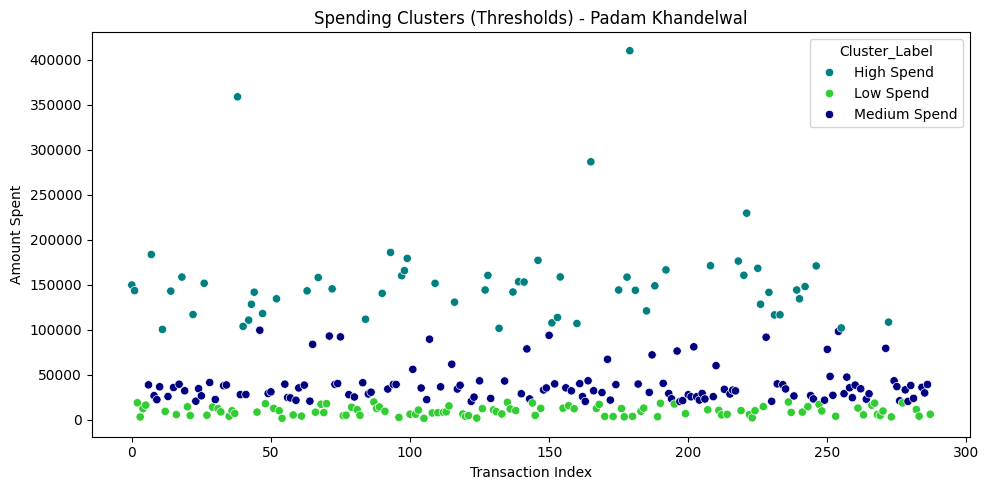

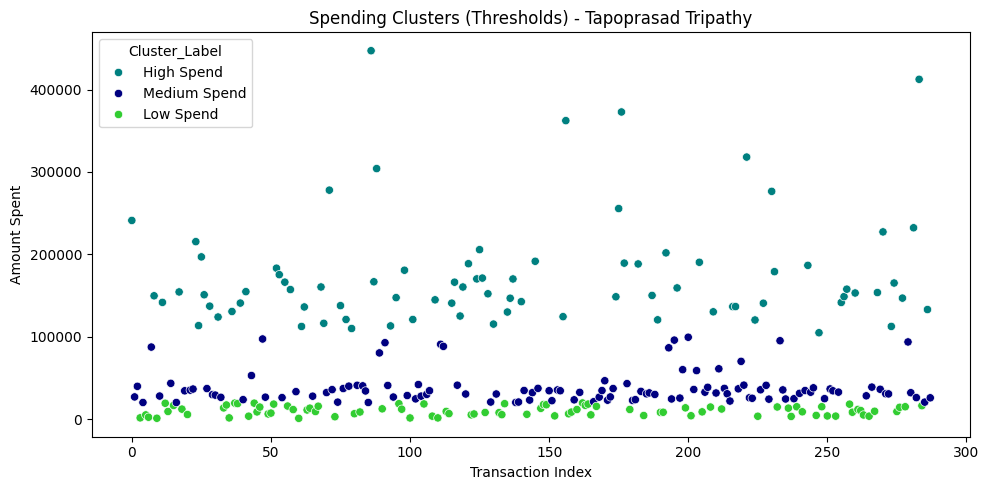

In [18]:
for user in users:
    user_data = df[df['User_ID'] == user].reset_index()
    
    plt.figure(figsize=(10, 5))
    sns.scatterplot(
        data=user_data,
        x=user_data.index,
        y='Amount_INR',
        hue='Spending Cluster',
        palette={'Low Spend': 'limegreen', 'Medium Spend': 'navy', 'High Spend': 'teal'}
    )
    plt.title(f'Spending Clusters (Thresholds) - {user}')
    plt.xlabel('Transaction Index')
    plt.ylabel('Amount Spent')
    plt.legend(title='Cluster_Label')
    plt.tight_layout()
    plt.show()

In [ ]:
import joblib

# Assuming your trained KMeans model is stored in the variable `kmeans`
joblib.dump(kmeans, 'kmeans_model.pkl')  # Save the model to a file